# Look through the data we have

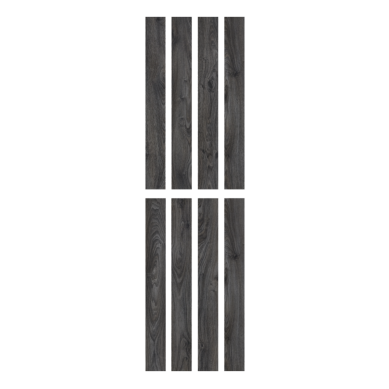

In [ ]:
# Import libs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image_path = '../data/floor/1.png'
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Some 'strange' examples

In our dataset, we have the following picture: `13.png`. It has an alpha channel and it was impossible to cut out the boards from it without proper handling:

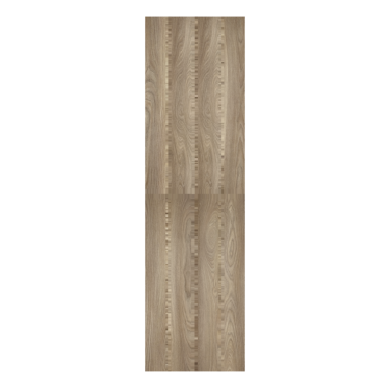

Image has an alpha channel


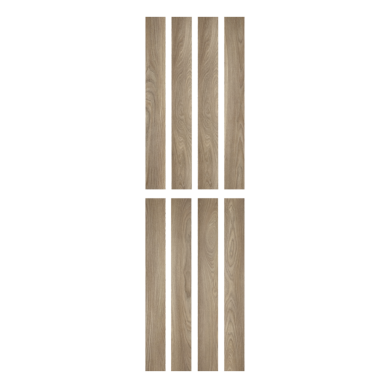

In [52]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = '../data/floor/13.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

# Display the image - it has 'artifacts'
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Read the image with alpha channel
img = cv2.imread('../data/floor/13.png', cv2.IMREAD_UNCHANGED)
# Check if the image has an alpha channel
if img.shape[2] == 4:
    print("Image has an alpha channel")
    # Convert to RGB (with the alpha channel)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image - no more 'artifacts'
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [122]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def extract_boards(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

    # Minimum width and height of contours we want to extract
    min_width = image.shape[1] // 20
    min_height = image.shape[0] // 2.4

    # Calculations of kernel sizes for blur and closing
    radius_w = image.shape[1] // 200 - (image.shape[1] // 200) % 2 + 1
    radius_h = image.shape[0] // 200 - (image.shape[0] // 200) % 2 + 1
    
    # Handling of alpha channel
    if image.shape[2] == 4:
        print('alpha channel')
        rgb = cv2.cvtColor(image[:, :, :3], cv2.COLOR_BGR2RGB)
        rgb = np.ascontiguousarray(rgb, dtype=np.uint8)
        alpha = image[:, :, 3]
        gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
        gray = cv2.merge([gray, gray, gray, alpha])
    else:
        print('no alpha channel')
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray = image

    # Blurring and closing the image -> better Canny edge detection
    blurred = cv2.GaussianBlur(gray, (radius_h, radius_w), 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (radius_h, radius_w))
    closed = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)

    plt.imshow(closed)
    plt.axis('off')
    plt.show()
    
    # Detecting edges and contours
    edged = cv2.Canny(closed, 10, 220)
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    boards = []     
    for i, contour in enumerate(contours):

        # Extracting the bounding box and checking its size
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:

            # Extracting boards
            board = image[y:y+h, x:x+w]
            boards.append(board)

            cv2.rectangle(rgb, (x, y), (x+w, y+h), (255, 0, 0), radius_w)
    if image.shape[2] == 4:
        rgb = cv2.merge((rgb, alpha))
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()
    return boards

alpha channel


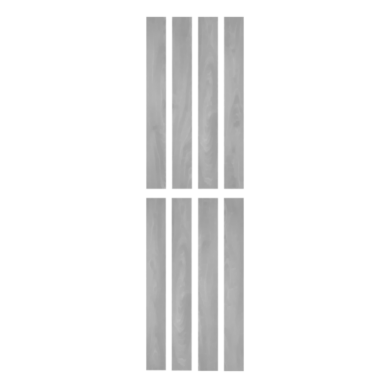

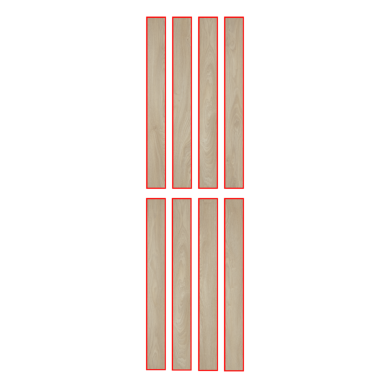

no alpha channel


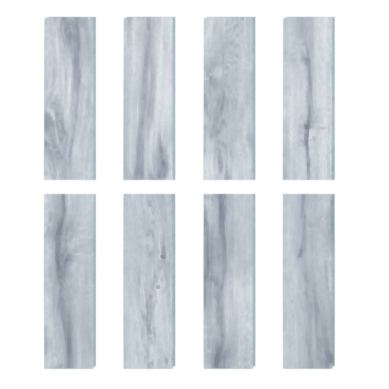

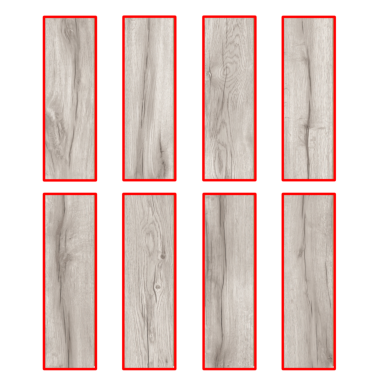

In [123]:
boards1 = extract_boards('../data/floor/2.png')
boards15 = extract_boards('../data/floor/15.jpg')

We observe that now, we can extract boards from pictures with alpha channels and without them.

# Prepare a dataset

alpha channel


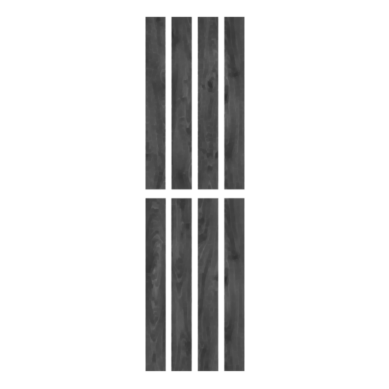

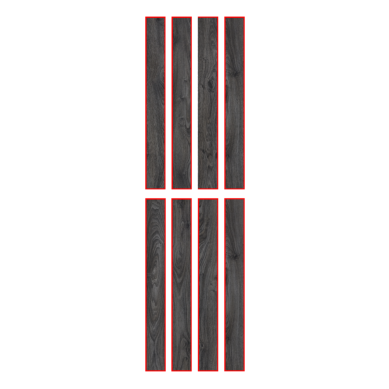

alpha channel


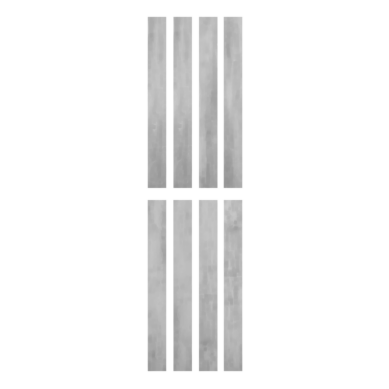

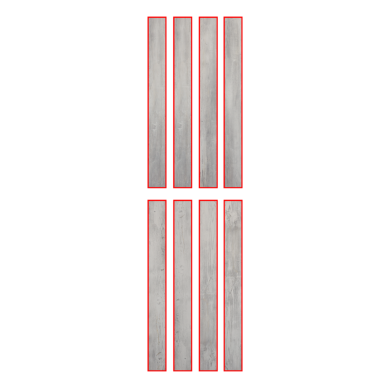

alpha channel


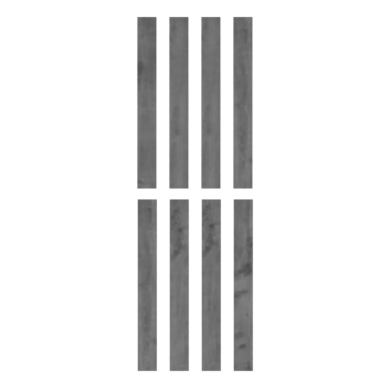

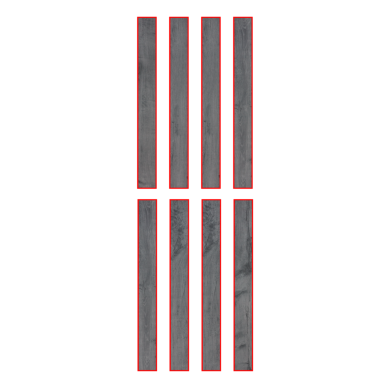

alpha channel


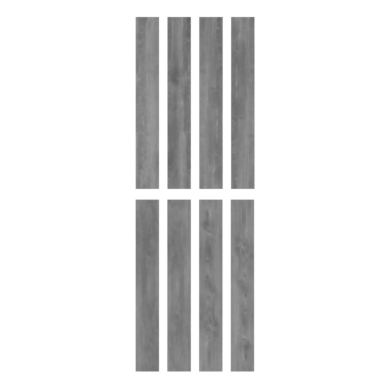

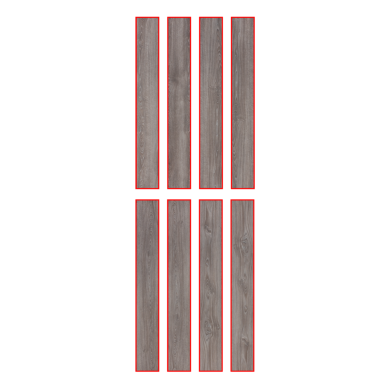

alpha channel


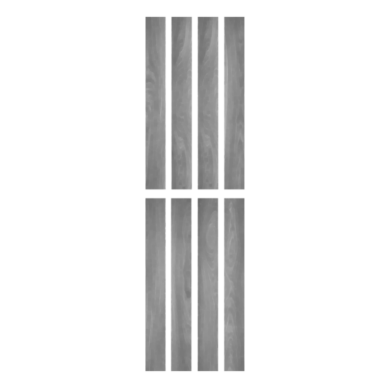

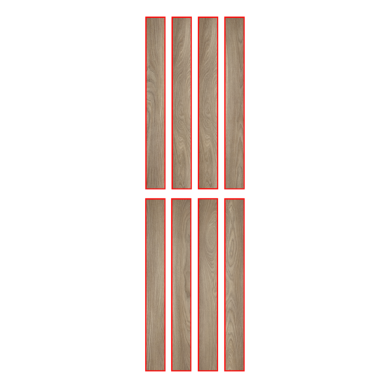

alpha channel


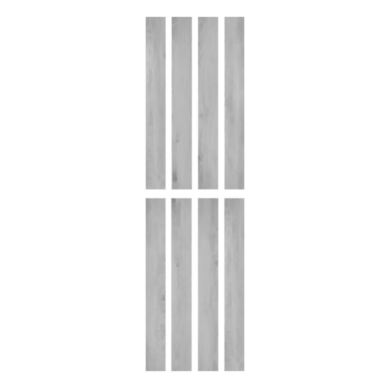

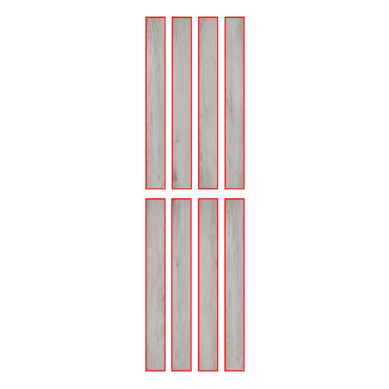

no alpha channel


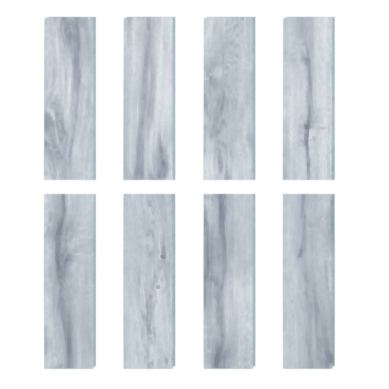

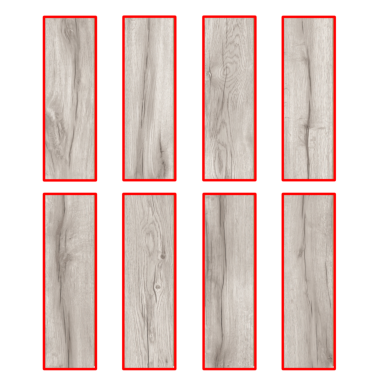

no alpha channel


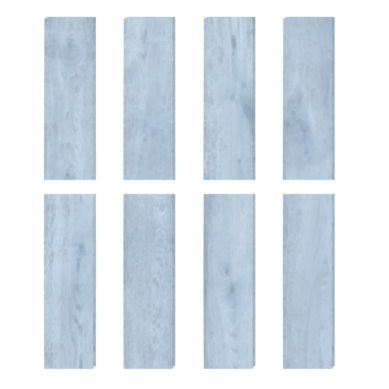

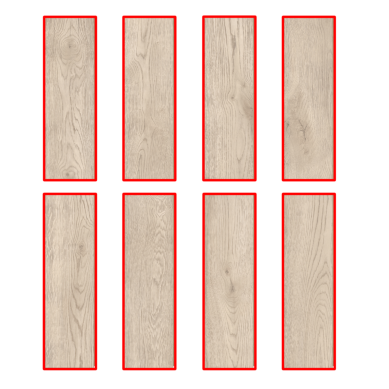

no alpha channel


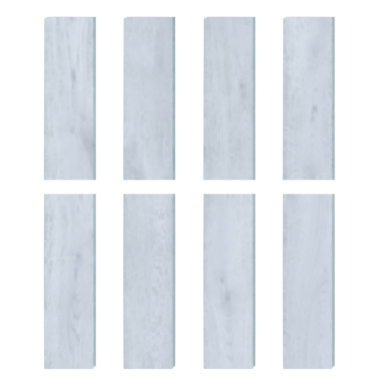

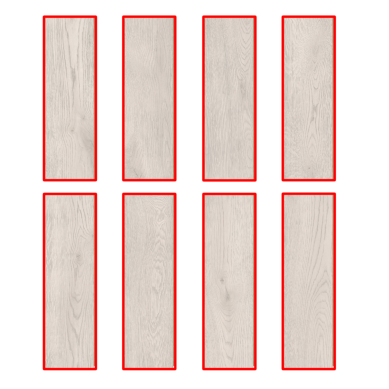

no alpha channel


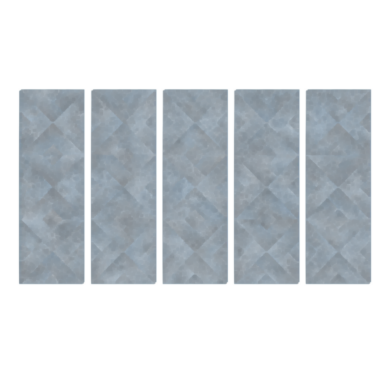

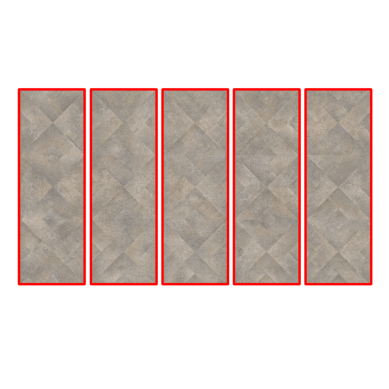

alpha channel


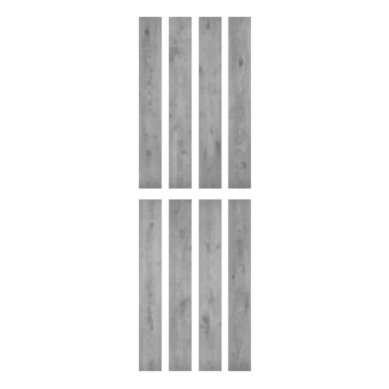

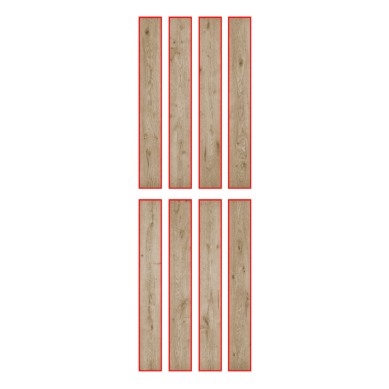

alpha channel


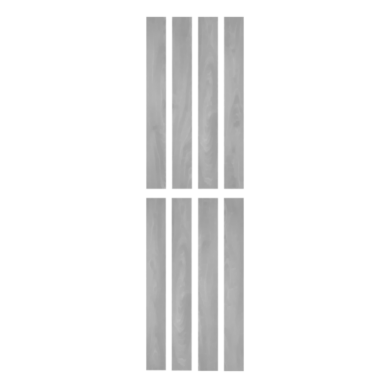

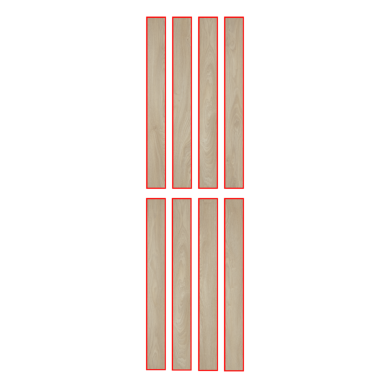

no alpha channel


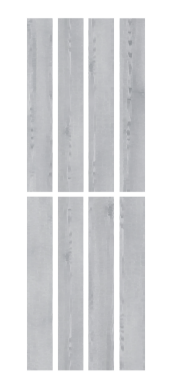

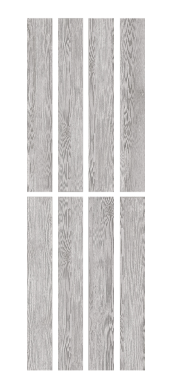

alpha channel


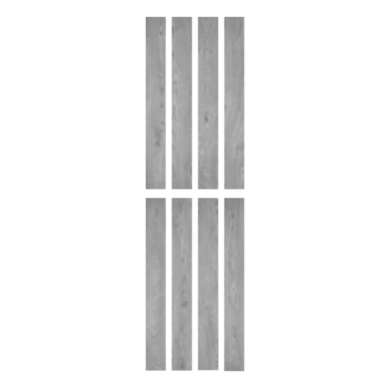

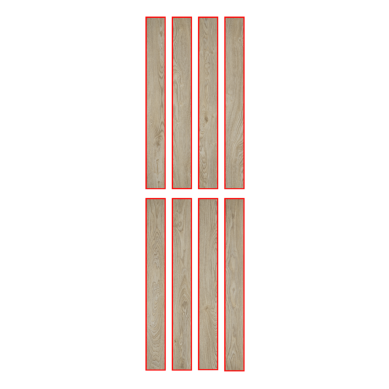

alpha channel


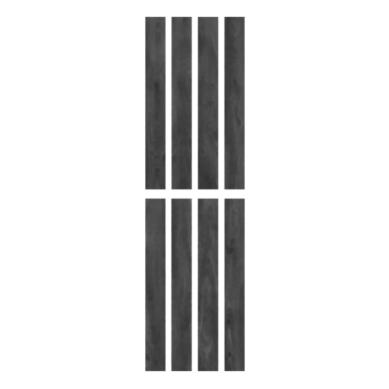

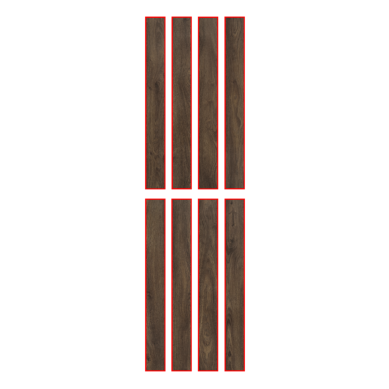

alpha channel


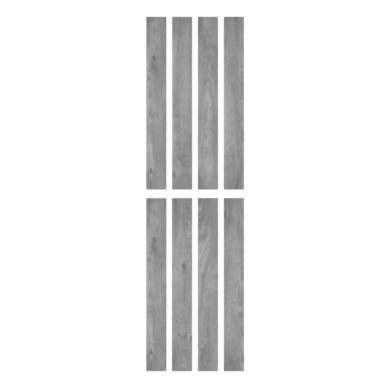

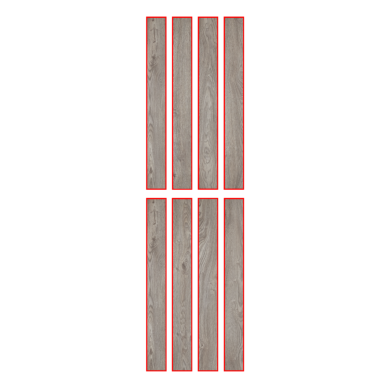

alpha channel


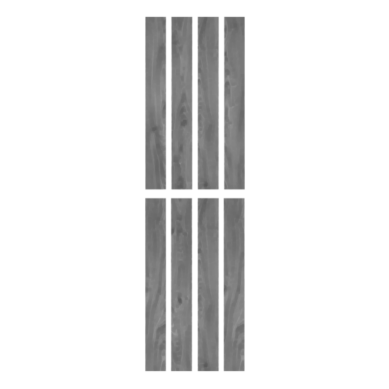

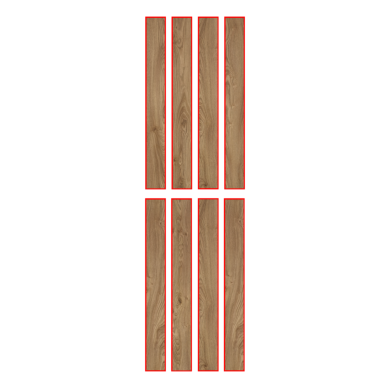

alpha channel


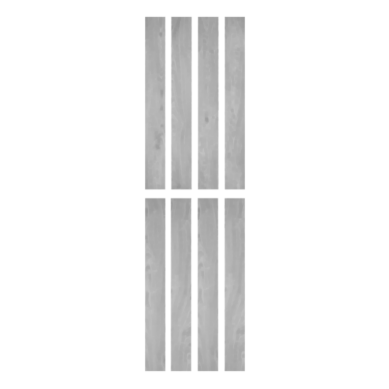

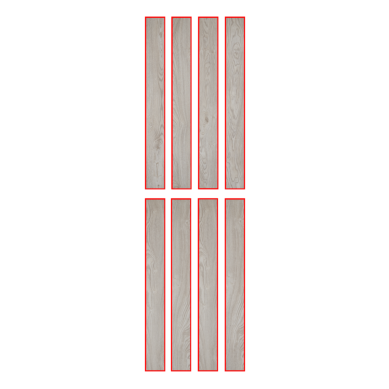

alpha channel


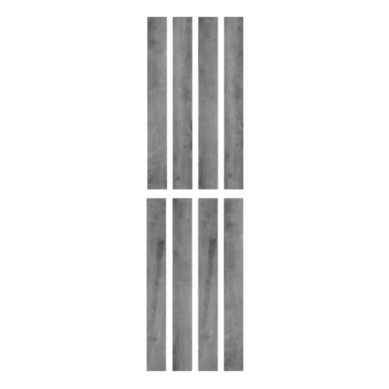

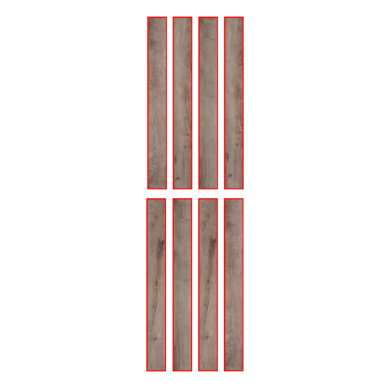

alpha channel


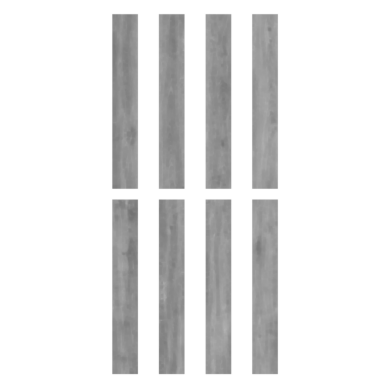

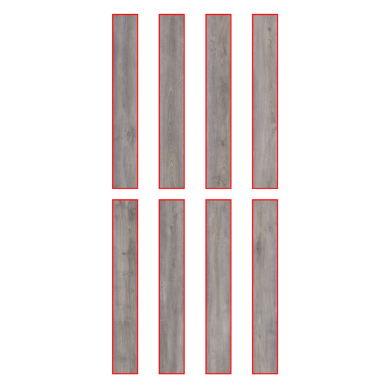

In [125]:
import os

input_folder = '../data/floor'
output_folder = '../data/laminate_boards'

# Make an output directory
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Look for all files in the dataset and extract boards
for filename in os.listdir(input_folder):
    if filename.endswith('.webp') or filename.endswith('.png') or filename.endswith('.jpg'):
        file_path = os.path.join(input_folder, filename)
        boards = extract_boards(file_path)
        for i, board in enumerate(boards):
            output_filename = f'{os.path.splitext(filename)[0]}_board_{i}.png'
            cv2.imwrite(os.path.join(output_folder, output_filename), board)